Projet : Accident de la route
==============

## Etape 3 : Modélisation

### Import des données

In [56]:
# import des librairies
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.max_info_columns

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import lazypredict
from lazypredict.supervised import LazyClassifier

import sklearn
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix,classification_report, f1_score, accuracy_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier

import sys
import joblib

In [60]:
# Version des librairies
print("Version de Python:", sys.version)
print("Version de pandas:", pd.__version__)
print("Version de scikit-learn:", sklearn.__version__)
print("Version de pandas:", np.__version__)

Version de Python: 3.10.14 (main, May 30 2024, 01:08:26) [GCC 11.4.0]
Version de pandas: 2.2.2
Version de scikit-learn: 1.5.0
Version de pandas: 1.26.4


In [3]:
# import des datasets
df_train = pd.read_csv("dataset/df_train.csv")
df_train.head()

df_test = pd.read_csv("dataset/df_test.csv")
df_test.head()

,place,catu,grav,sexe,trajet,secu1,locp,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,lum,com,agg,int,atm,col,lat,long,senc,catv,obs,obsm,choc,manv,motor,age_group,h_group,weekday,index
0,1,1,1,2,5,1,0,4,-1,2,0,1,1,1,0,1,50,5,66136,2,2,1,3,42.70,2.89,1,6,0,2,7,1,1,4,2,5,422246
1,5,2,1,2,0,1,-1,7,2,4,0,2,1,1,0,1,50,5,13215,2,1,1,3,43.37,5.35,0,3,0,2,7,1,1,6,1,2,176315
2,1,1,1,1,4,1,-1,1,1,2,0,1,3,1,0,1,80,1,69283,1,1,1,5,45.67,4.94,2,5,0,2,1,13,1,4,6,1,236564
3,1,1,0,2,9,1,0,1,3,4,0,1,1,2,0,1,130,3,87014,1,1,2,5,46.09,1.36,2,6,1,0,3,2,1,7,7,6,262438
4,1,1,1,1,5,1,0,1,3,1,0,1,1,1,8,1,70,1,67462,1,1,1,2,48.29,7.46,1,3,4,2,1,1,1,3,6,5,182769


### Séparation des données

In [4]:
X_train = df_train.drop(["grav","index"], axis=1)
y_train = df_train.grav

X_test = df_test.drop(["grav","index"], axis=1)
y_test = df_test.grav

### Aperçu  de la performance relative des différents modèles de classification

In [5]:
#models_list = [AdaBoostClassifier, XGBClassifier, LGBMClassifier, KNeighborsClassifier, ExtraTreesClassifier]

In [5]:
# Initialiser LazyClassifier
clf = LazyClassifier(verbose=0, 
                     ignore_warnings=True, 
                     custom_metric=None,
                     predictions=True
                     #, classifiers=models_list
                     )

# Entrainer et évaluer les modèles
models_train, predictions_train = clf.fit(X_train, X_test, y_train, y_test)

# Afficher les résultats
print(models_train)

 97%|█████████▋| 30/31 [4:06:20<14:37, 877.39s/it]   

[LightGBM] [Info] Number of positive: 212781, number of negative: 152361
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 365142, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.582735 -> initscore=0.334011
[LightGBM] [Info] Start training from score 0.334011


100%|██████████| 31/31 [4:06:22<00:00, 476.84s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.81               0.81     0.81      0.82   
XGBClassifier                      0.81               0.81     0.81      0.81   
ExtraTreesClassifier               0.81               0.81     0.81      0.81   
LGBMClassifier                     0.81               0.80     0.80      0.81   
BaggingClassifier                  0.79               0.79     0.79      0.79   
SVC                                0.79               0.79     0.79      0.79   
AdaBoostClassifier                 0.79               0.79     0.79      0.79   
NuSVC                              0.79               0.79     0.79      0.79   
KNeighborsClassifier               0.75               0.75     0.75      0.75   
QuadraticDiscriminantAnalysis      0.73               0.75     0.75      0.73   
LinearDiscriminantAnalysis  

In [6]:
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.81,0.81,0.81,0.82,60.79
XGBClassifier,0.81,0.81,0.81,0.81,1.37
ExtraTreesClassifier,0.81,0.81,0.81,0.81,73.58
LGBMClassifier,0.81,0.80,0.80,0.81,1.96
BaggingClassifier,0.79,0.79,0.79,0.79,47.47
SVC,0.79,0.79,0.79,0.79,6191.65
AdaBoostClassifier,0.79,0.79,0.79,0.79,24.33
NuSVC,0.79,0.79,0.79,0.79,8257.96
KNeighborsClassifier,0.75,0.75,0.75,0.75,89.09


In [7]:
# Sauvegarder les résultats
joblib.dump(models_train, 'models_saved/lazy_classifier.joblib')

['models_saved/lazy_classifier.joblib']

### Modélisation

#### Modèle Adaboost

In [16]:
# model adaboost

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


hp_ada = {
    'n_estimators': [600, 700, 800],        # Nombre de classificateurs faibles
    'learning_rate': [0.01, 0.1],     # Taux d'apprentissage : ajuste la contribution de chaque classificateur faible à la prédiction finale
    'algorithm': ['SAMME.R']      # Algorithme utilisé: 'SAMME.R'
}

dtc = DecisionTreeClassifier(random_state=42, max_depth=1)

gs_ada= GridSearchCV(estimator=AdaBoostClassifier(random_state=42, estimator=dtc),
                     param_grid=hp_ada,
                           cv = 5,  # Nombre de folds pour la validation croisée
                           verbose = 3, # Affiche le degré de détail des calculs
                           refit=True, # réentraine le modèle avec toutes les données
                           scoring="f1",
                           n_jobs = -1)  # Utiliser etous les cours du CPU

gs_ada.fit(X_train_scaled, y_train)

best_hp_ada = gs_ada.best_params_
best_score_ada = gs_ada.best_score_
best_estimator_ada = gs_ada.best_estimator_

print("Meilleurs paramètres trouvés:", best_hp_ada)
print("Meilleur score de validation croisée:", best_score_ada)

y_pred_ada = best_estimator_ada.predict(X_test_scaled)

importances_model_ada = best_estimator_ada.feature_importances_
print(importances_model_ada)

# Évaluer le modèle
accuracy_ada = accuracy_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada, average='binary') 
report_ada = classification_report(y_test, y_pred_ada)

# Afficher les résultats
print(f"Adaboost Classifier Accuracy: {accuracy_ada:.2f}")
print(f"Adaboost Classifier f1-score: {f1_ada:.2f}")
print("\nClassification Report:")
print(report_ada)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/home/yu/workspace/acc_route/env_acc_route/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/yu/workspace/acc_route/env_acc_route/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/yu/workspace/acc_route/env_acc_route/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/yu/workspace/acc_route/env_acc_route/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is depr

[CV 1/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=600;, score=0.774 total time=13.0min


/home/yu/workspace/acc_route/env_acc_route/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=600;, score=0.776 total time=13.3min
[CV 4/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=600;, score=0.773 total time=13.3min


/home/yu/workspace/acc_route/env_acc_route/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/yu/workspace/acc_route/env_acc_route/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=600;, score=0.775 total time=13.3min


/home/yu/workspace/acc_route/env_acc_route/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=600;, score=0.773 total time=13.4min


/home/yu/workspace/acc_route/env_acc_route/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=700;, score=0.775 total time=15.2min
[CV 5/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=700;, score=0.772 total time=15.2min


/home/yu/workspace/acc_route/env_acc_route/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/yu/workspace/acc_route/env_acc_route/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=700;, score=0.774 total time=15.2min


/home/yu/workspace/acc_route/env_acc_route/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=700;, score=0.775 total time=15.3min


/home/yu/workspace/acc_route/env_acc_route/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=700;, score=0.776 total time=15.6min


/home/yu/workspace/acc_route/env_acc_route/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=800;, score=0.782 total time=17.4min


/home/yu/workspace/acc_route/env_acc_route/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=800;, score=0.783 total time=17.9min


/home/yu/workspace/acc_route/env_acc_route/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=600;, score=0.811 total time=13.1min


/home/yu/workspace/acc_route/env_acc_route/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=600;, score=0.809 total time=13.6min


/home/yu/workspace/acc_route/env_acc_route/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=600;, score=0.812 total time=13.2min


/home/yu/workspace/acc_route/env_acc_route/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=600;, score=0.809 total time=13.2min


/home/yu/workspace/acc_route/env_acc_route/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=600;, score=0.808 total time=13.6min


/home/yu/workspace/acc_route/env_acc_route/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=800;, score=0.784 total time=17.5min


/home/yu/workspace/acc_route/env_acc_route/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=800;, score=0.781 total time=17.7min
[CV 1/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=700;, score=0.811 total time=15.9min
[CV 5/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=800;, score=0.780 total time=18.0min
[CV 2/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=700;, score=0.812 total time=16.0min
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=700;, score=0.813 total time=15.1min
[CV 4/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=700;, score=0.810 total time=15.3min
[CV 5/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=700;, score=0.810 total time=11.3min
[CV 1/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=800;, score=0.812 total time=12.3min
[CV 2/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=800;, score=0.813 total time=11.4min
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=800;, score=0.814 total t

##### Matrice de confusion

Matrice de confusion :
 [[30135  7956]
 [11165 42030]]


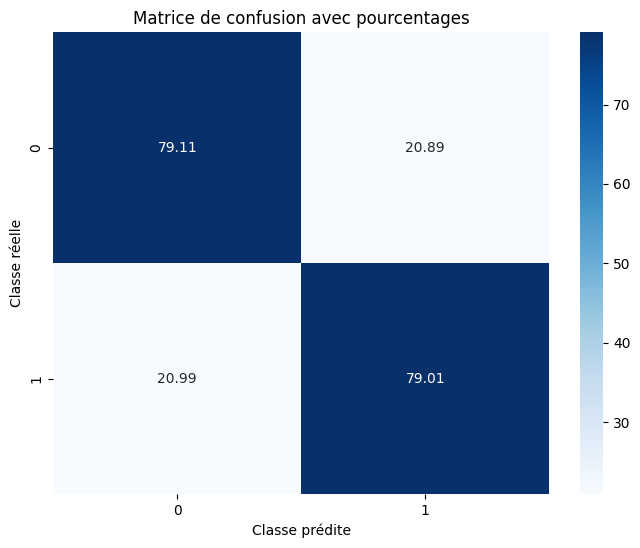

In [17]:
cm_ada = confusion_matrix(y_test, y_pred_ada)
print("Matrice de confusion :\n", cm_ada)

row_sums_ada = cm_ada.sum(axis = 1)
cm_percent_ada = (cm_ada.T / row_sums_ada).T * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent_ada, annot = True, fmt = ".2f", cmap = "Blues")
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.title('Matrice de confusion avec pourcentages')
plt.show();

##### Importances features

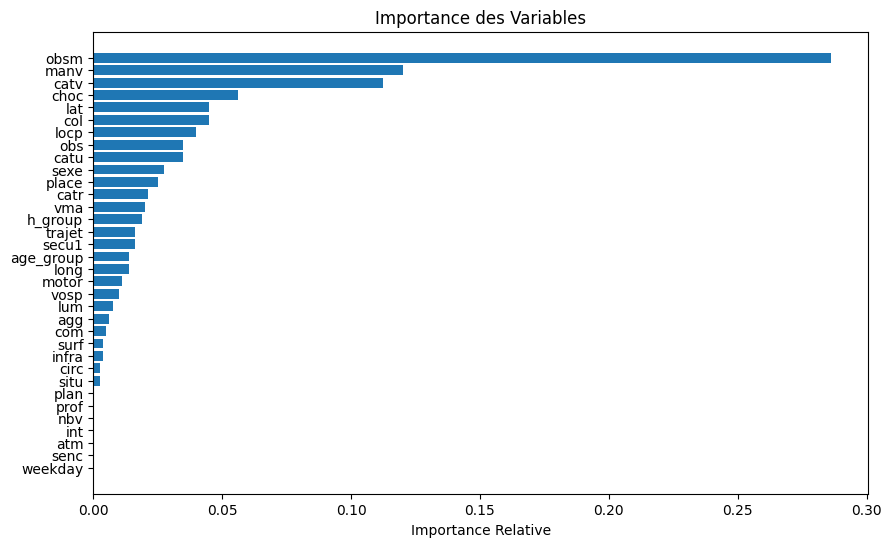

In [52]:
features = X_train.columns

importances_ada = best_estimator_ada.feature_importances_
indices_ada = np.argsort(importances_ada)

plt.figure(figsize=(10, 6))
plt.title("Importance des Variables")
plt.barh(range(len(indices_ada)), importances_ada[indices_ada], align="center")
plt.yticks(range(len(indices_ada)), [features[i] for i in indices_ada])
plt.xlabel('Importance Relative')
plt.show()

##### Sauvegarde du modèle

In [9]:
# Sauvegarder le modèle
joblib.dump(best_estimator_ada, 'models_saved/best_estimator_ada_model.joblib')

['models_saved/best_estimator_ada_model.joblib']

#### Modèle Random Forest Classifier

In [20]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# model baseline
model = RandomForestClassifier(random_state=42).fit(X_train_scaled, y_train)
y_pred_rf_1 = model.predict(X_test_scaled)

best_hp_rf_1 = model.get_params
print("Meilleurs paramètres trouvés:", best_hp_rf_1)

importances_model = model.feature_importances_
print(importances_model)

# Évaluer le modèle
accuracy_rf = accuracy_score(y_test, y_pred_rf_1)
report_rf = classification_report(y_test, y_pred_rf_1)
f1_rf = f1_score(y_test, y_pred_rf_1, average='binary') 

# Afficher les résultats
print(" ")
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest Classifier f1-score: {f1_rf:.2f}")
print("\nClassification Report:")
print(report_rf)

Meilleurs paramètres trouvés: <bound method BaseEstimator.get_params of RandomForestClassifier(random_state=42)>
[0.03990293 0.03134351 0.0152261  0.02369087 0.01351158 0.02224427
 0.01666631 0.01396233 0.01945496 0.00625401 0.01019532 0.00980528
 0.0084554  0.01072554 0.00773937 0.02331236 0.01247187 0.05587568
 0.01158316 0.01604782 0.01177034 0.04759401 0.06056232 0.06067711
 0.01901507 0.16498982 0.03188728 0.04883438 0.03652321 0.03702645
 0.01856679 0.03529952 0.02835758 0.03042748]
 
Random Forest Classifier Accuracy: 0.81
Random Forest Classifier f1-score: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78     38091
           1       0.85      0.83      0.84     53195

    accuracy                           0.81     91286
   macro avg       0.81      0.81      0.81     91286
weighted avg       0.82      0.81      0.82     91286



##### Matrice de confusion

Matrice de confusion :
 [[30439  7652]
 [ 9267 43928]]


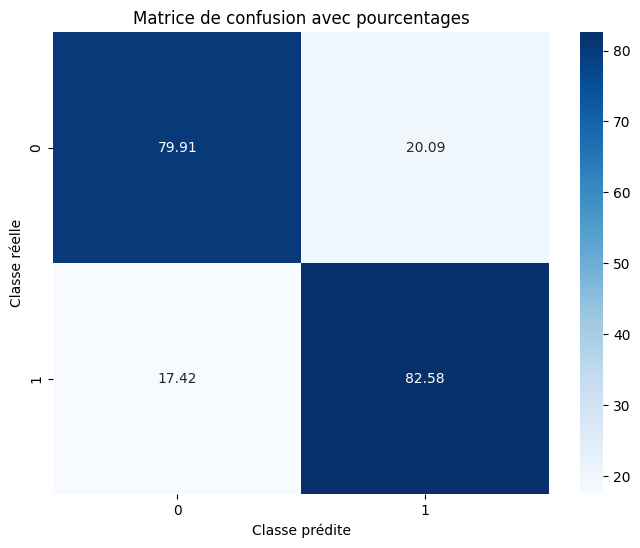

In [21]:
cm_rf_1 = confusion_matrix(y_test, y_pred_rf_1)
print("Matrice de confusion :\n", cm_rf_1)

row_sums_rf_1 = cm_rf_1.sum(axis = 1)
cm_percent_rf_1 = (cm_rf_1.T / row_sums_rf_1).T * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent_rf_1, annot = True, fmt = ".2f", cmap = "Blues")
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.title('Matrice de confusion avec pourcentages')
plt.show();

##### Importances features

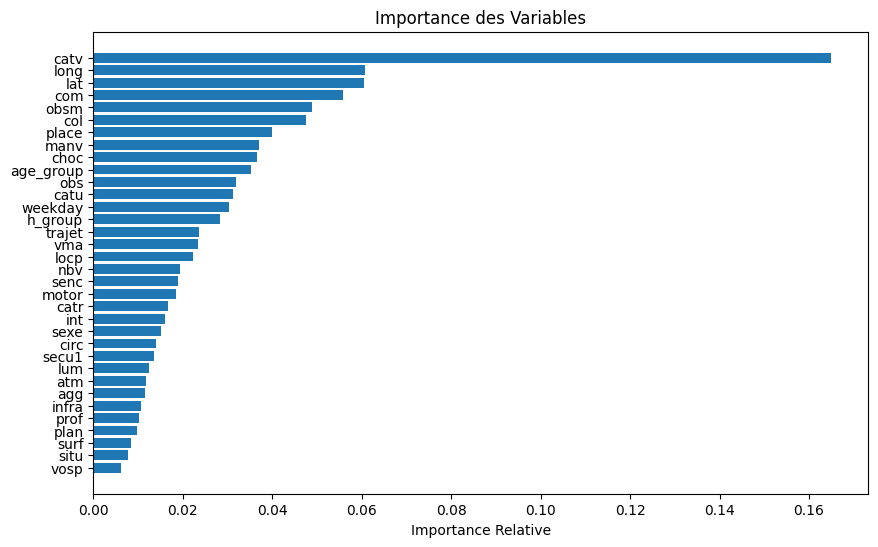

In [53]:
features = X_train.columns

importances_rf = model.feature_importances_
indices_rf = np.argsort(importances_rf)

plt.figure(figsize=(10, 6))
plt.title("Importance des Variables")
plt.barh(range(len(indices_rf)), importances_rf[indices_rf], align="center")
plt.yticks(range(len(indices_rf)), [features[i] for i in indices_rf])
plt.xlabel('Importance Relative')
plt.show()

##### Sauvegarde du modèle

In [71]:
# Sauvegarder les résultats
joblib.dump(model, 'Brouillons/rf_model.joblib')

['Brouillons/rf_model.joblib']

#### Modèle ExtraTreesClassifier

In [22]:
# ExtraTreesClassifier

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialiser et entraîner le modèle ExtraTreesClassifier
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_clf.fit(X_train_scaled, y_train)

# Prédire les valeurs pour l'ensemble de test
y_pred_extrTr = et_clf.predict(X_test_scaled)

# Importances des variables
importances_model_et = et_clf.feature_importances_
print(importances_model_et)

# Évaluer le modèle
accuracy_et = accuracy_score(y_test, y_pred_extrTr)
report_et = classification_report(y_test, y_pred_extrTr)
f1_et = f1_score(y_test, y_pred_extrTr, average='binary') 

# Afficher les résultats
print(" ")
print(f"Extra Trees Classifier Accuracy: {accuracy_et:.2f}")
print(f"Extra Trees Classifier f1-score: {f1_et:.2f}")
print("\nClassification Report:")
print(report_et)

[0.03747898 0.03403328 0.01579587 0.02914137 0.01380268 0.02313793
 0.02079351 0.01843637 0.02245456 0.00853018 0.01467489 0.01370111
 0.01347632 0.0139844  0.01086324 0.02299184 0.01576031 0.03639061
 0.02013592 0.01996659 0.01467812 0.04826908 0.03511369 0.03482993
 0.02542915 0.16399483 0.03675406 0.03746342 0.03840043 0.03735182
 0.02293935 0.03771612 0.03030456 0.03120547]
 
Extra Trees Classifier Accuracy: 0.81
Extra Trees Classifier f1-score: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78     38091
           1       0.85      0.82      0.83     53195

    accuracy                           0.81     91286
   macro avg       0.80      0.81      0.80     91286
weighted avg       0.81      0.81      0.81     91286



##### Matrice de confusion

Matrice de confusion :
 [[30054  8037]
 [ 9360 43835]]


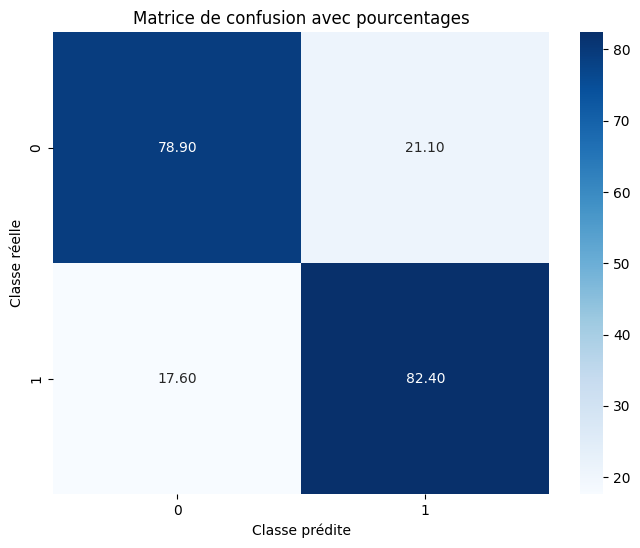

In [23]:
cm_et = confusion_matrix(y_test, y_pred_extrTr)
print("Matrice de confusion :\n", cm_et)

row_sums_et = cm_et.sum(axis = 1)
cm_percent_et = (cm_et.T / row_sums_et).T * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent_et, annot = True, fmt = ".2f", cmap = "Blues")
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.title('Matrice de confusion avec pourcentages')
plt.show();

##### Importances features

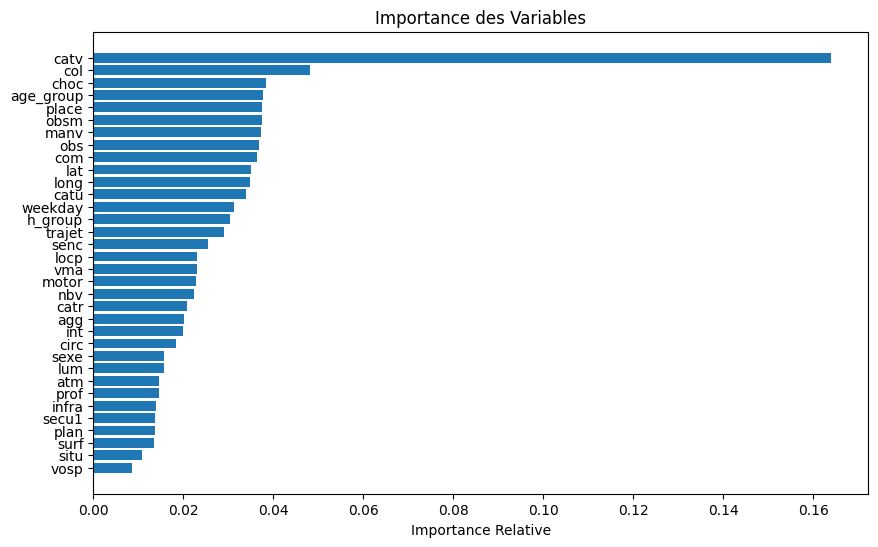

In [61]:
features = X_train.columns

importances_et = et_clf.feature_importances_
indices_et = np.argsort(importances_et)

plt.figure(figsize=(10, 6))
plt.title("Importance des Variables")
plt.barh(range(len(indices_et)), importances_et[indices_et], align="center")
plt.yticks(range(len(indices_et)), [features[i] for i in indices_et])
plt.xlabel('Importance Relative')
plt.show()

##### Sauvegarde du modèle

In [24]:
# Sauvegarder le modèle
joblib.dump(et_clf, 'Brouillons/extra_tree_classifier_model.joblib')

['Brouillons/extra_tree_classifier_model.joblib']

#### Modèle XGBClassifier

In [25]:
# XGBClassifier

# Initialiser et entraîner le modèle XGBClassifier
xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

# Prédire les valeurs pour l'ensemble de test
y_pred_xgb = xgb_clf.predict(X_test)

# Importances des variables
importances_model_xgb = xgb_clf.feature_importances_
print(importances_model_xgb)

# Évaluer le modèle
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='binary') 

# Afficher les résultats
print(" ")
print(f"XGB Classifier Accuracy: {accuracy_xgb:.2f}")
print(f"XGB Classifier f1-score: {f1_xgb:.2f}")
print("\nClassification Report:")
print(report_xgb)

[0.16691127 0.07198627 0.05264178 0.0067758  0.01524472 0.01524029
 0.00639255 0.00349256 0.00353986 0.00520963 0.00273695 0.0037683
 0.00518285 0.00311679 0.00599474 0.01371715 0.0039551  0.00591151
 0.10173599 0.00702923 0.00321262 0.03087499 0.00550285 0.00444891
 0.00311148 0.25405744 0.09501792 0.0525703  0.01112387 0.016412
 0.00560066 0.00569687 0.00844243 0.00334434]
 
XGB Classifier Accuracy: 0.81
XGB Classifier f1-score: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78     38091
           1       0.84      0.83      0.84     53195

    accuracy                           0.81     91286
   macro avg       0.81      0.81      0.81     91286
weighted avg       0.81      0.81      0.81     91286



##### Matrice de confusion

Matrice de confusion :
 [[29941  8150]
 [ 8851 44344]]


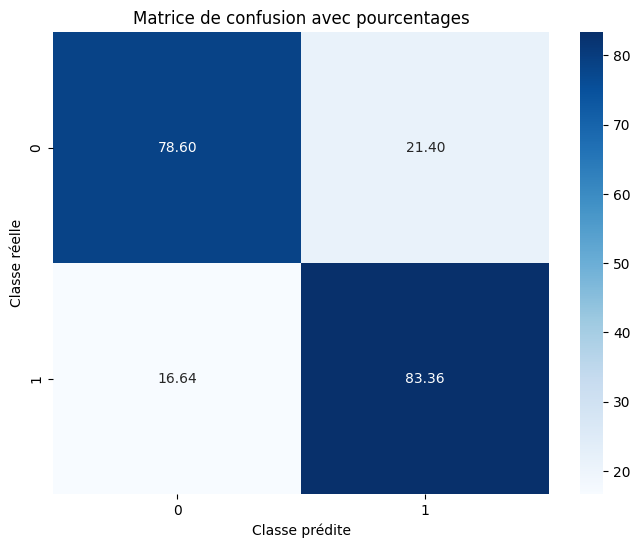

In [26]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Matrice de confusion :\n", cm_xgb)

row_sums_xgb = cm_xgb.sum(axis = 1)
cm_percent_xgb = (cm_xgb.T / row_sums_xgb).T * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent_xgb, annot = True, fmt = ".2f", cmap = "Blues")
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.title('Matrice de confusion avec pourcentages')
plt.show();

##### Importances features

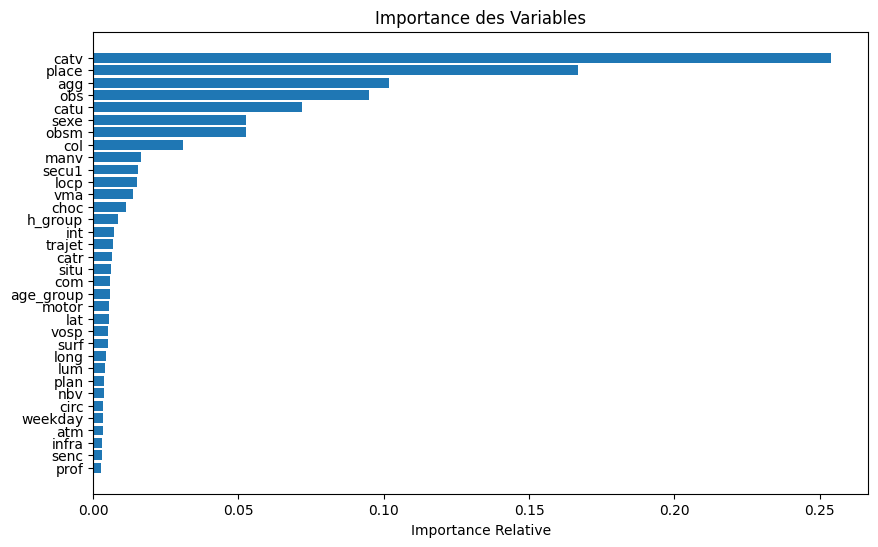

In [62]:
features = X_train.columns

importances_xgb = xgb_clf.feature_importances_
indices_xgb = np.argsort(importances_xgb)

plt.figure(figsize=(10, 6))
plt.title("Importance des Variables")
plt.barh(range(len(indices_xgb)), importances_xgb[indices_xgb], align="center")
plt.yticks(range(len(indices_xgb)), [features[i] for i in indices_xgb])
plt.xlabel('Importance Relative')
plt.show()

##### Sauvegarde du modèle

In [27]:
# Sauvegarder le modèle
joblib.dump(xgb_clf, 'models_saved/GBClassifier_model.joblib')

['models_saved/GBClassifier_model.joblib']

#### Modèle LGBMClassifier

In [28]:
# LGBMClassifier

# Initialiser et entraîner le modèle LightGBM
lig_clf = LGBMClassifier(use_label_encoder=False, eval_metric='logloss')
lig_clf.fit(X_train, y_train)

# Prédire les valeurs pour l'ensemble de test
y_pred_lgbm = lig_clf.predict(X_test)

# Importances des variables
importances_model_lgbm = lig_clf.feature_importances_
print(importances_model_lgbm)

# Évaluer le modèle
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
report_lgbm = classification_report(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm, average='binary') 

# Afficher les résultats
print(" ")
print(f"LGBM Classifier Accuracy: {accuracy_lgbm:.2f}")
print(f"LGBM Classifier f1-score: {f1_lgbm:.2f}")
print("\nClassification Report:")
print(report_lgbm)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Info] Number of positive: 212781, number of negative: 152361
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1058
[LightGBM] [Info] Number of data points in the train set: 365142, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.582735 -> initscore=0.334011
[LightGBM] [Info] Start training from score 0.334011
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: use_label_encoder
[133  92  75  54  26  83  74  15  21  19   6  23  34   8  56  89  25 120
  31  75   5 313 113 117   7 231 120 3

##### Matrice de confusion

Matrice de confusion :
 [[29677  8414]
 [ 8981 44214]]


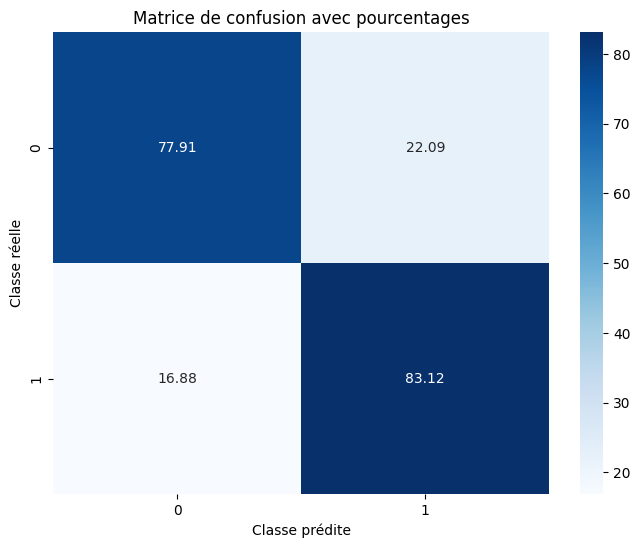

In [29]:
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
print("Matrice de confusion :\n", cm_lgbm)

row_sums_lgbm = cm_lgbm.sum(axis = 1)
cm_percent_lgbm = (cm_lgbm.T / row_sums_lgbm).T * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent_lgbm, annot = True, fmt = ".2f", cmap = "Blues")
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.title('Matrice de confusion avec pourcentages')
plt.show();

##### Importances features

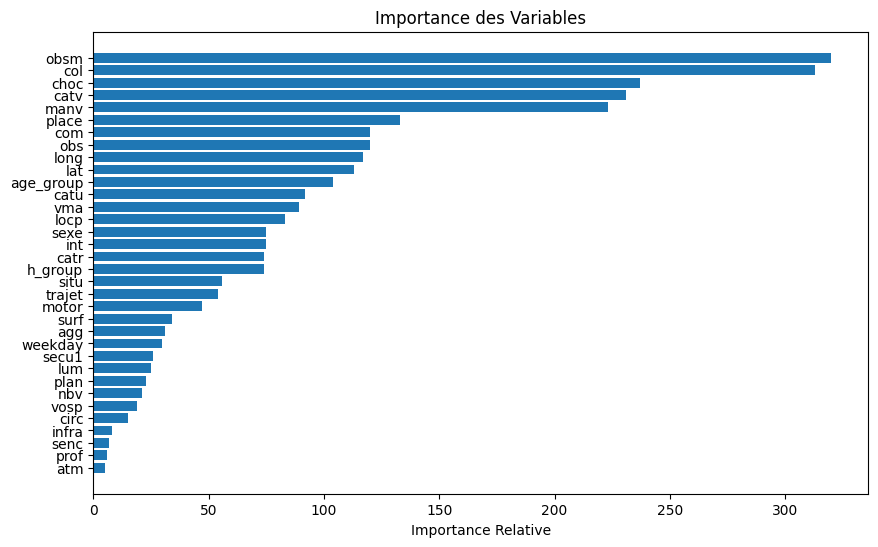

In [64]:
features = X_train.columns

importances_lgbm = lig_clf.feature_importances_
indices_lgbm = np.argsort(importances_lgbm)

plt.figure(figsize=(10, 6))
plt.title("Importance des Variables")
plt.barh(range(len(indices_lgbm)), importances_lgbm[indices_lgbm], align="center")
plt.yticks(range(len(indices_lgbm)), [features[i] for i in indices_lgbm])
plt.xlabel('Importance Relative')
plt.show()

##### Sauvegarde du modèle

In [30]:
# Sauvegarder le modèle
joblib.dump(lig_clf, 'models_saved/LGBMClassifier_model.joblib')

['models_saved/LGBMClassifier_model.joblib']

#### Modèle KNeighborsClassifier

In [32]:
# KNeighborsClassifier

# Initialiser et entraîner le modèle KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

# Prédire les valeurs pour l'ensemble de test
y_pred_knn = knn_clf.predict(X_test)

# Évaluer le modèle
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='binary')

# Afficher les résultats
print(" ")
print(f"KNeighbors Classifier Accuracy: {accuracy_knn:.2f}")
print(f"KNeighbors Classifier f1-score: {f1_knn:.2f}")
print("\nClassification Report:")
print(report_knn)

 
KNeighbors Classifier Accuracy: 0.65
KNeighbors Classifier f1-score: 0.69

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.62      0.60     38091
           1       0.71      0.67      0.69     53195

    accuracy                           0.65     91286
   macro avg       0.64      0.65      0.64     91286
weighted avg       0.66      0.65      0.65     91286



##### Matrice de confusion

Matrice de confusion :
 [[23679 14412]
 [17492 35703]]


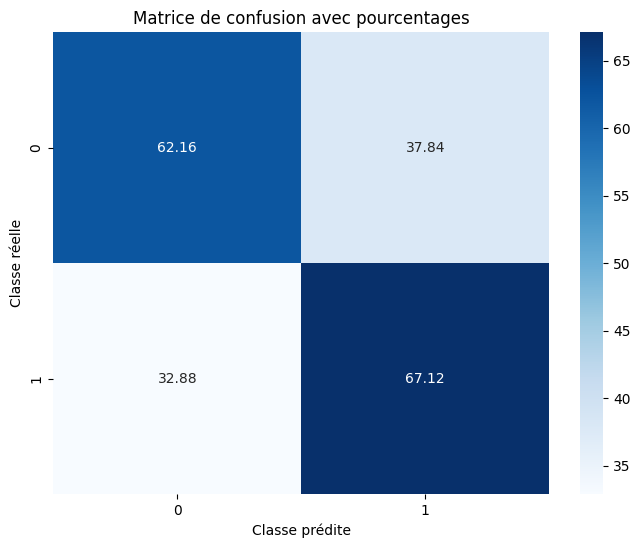

In [33]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Matrice de confusion :\n", cm_knn)

row_sums_knn = cm_knn.sum(axis = 1)
cm_percent_knn = (cm_knn.T / row_sums_knn).T * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent_knn, annot = True, fmt = ".2f", cmap = "Blues")
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.title('Matrice de confusion avec pourcentages')
plt.show();

##### Sauvegarde du modèle

In [34]:
# Sauvegarder le modèle
joblib.dump(knn_clf, 'models_saved/KNeighborsClassifier_model.joblib')

['models_saved/KNeighborsClassifier_model.joblib']

### Cross Validation

In [35]:
# Cross validation - XGBClassifier - KFold = 5

# Initialisation du modèle
model_xgbc = XGBClassifier()

# Configuration de la validation croisée K-Fold
kf_xgbc = KFold(n_splits=5, shuffle=True, random_state=42)

# Évaluation du modèle avec la validation croisée
scores_xgbc = cross_val_score(model_xgbc, X_train, y_train, cv=kf_xgbc)
std_score_xgbc = np.std(scores_xgbc)    # Écart-type des scores
print("Scores de validation croisée : ", scores_xgbc)
print("Score moyen : ", scores_xgbc.mean())
print("Ecart type  : ", std_score_xgbc)

Scores de validation croisée :  [0.81195142 0.81292363 0.81064797 0.81361943 0.81194884]
Score moyen :  0.812218259092267
Ecart type  :  0.0010070192798797518


In [34]:
# Cross validation - AdaBoostClassifier

# Initialisation du modèle
model_ada = AdaBoostClassifier()

# Configuration de la validation croisée K-Fold
kf_ada = KFold(n_splits=5, shuffle=True, random_state=42)

# Évaluation du modèle avec la validation croisée
scores_ada = cross_val_score(model_ada, X_train, y_train, cv=kf_ada)
std_score_ada = np.std(scores_ada)    # Écart-type des scores
print("Scores de validation croisée : ", scores_ada)
print("Score moyen : ", scores_ada.mean())
print("Ecart type moyen : ", std_score_ada)

Scores de validation croisée :  [0.78783165 0.78836842 0.78789738 0.78666813 0.78867284]
Score moyen :  0.787887683414686
Ecart type moyen :  0.0006838318929365241


In [36]:
# Cross validation - ExtraTreesClassifier

# Initialisation du modèle
model_et = ExtraTreesClassifier()

# Configuration de la validation croisée K-Fold
kf_et = KFold(n_splits=5, shuffle=True, random_state=42)

# Évaluation du modèle avec la validation croisée
scores_et = cross_val_score(model_et, X_train, y_train, cv=kf_et)
std_score_et = np.std(scores_et)    # Écart-type des scores
print("Scores de validation croisée : ", scores_et)
print("Score moyen : ", scores_et.mean())
print("Ecart type moyen : ", std_score_et)

Scores de validation croisée :  [0.80643306 0.80617289 0.80482829 0.80855288 0.80775867]
Score moyen :  0.8067491575670946
Ecart type moyen :  0.0012957076829876002


In [37]:
# Cross validation - LGBMClassifier

# Initialisation du modèle
model_lgbm = LGBMClassifier()

# Configuration de la validation croisée K-Fold
kf_lgbm = KFold(n_splits=5, shuffle=True, random_state=42)

# Évaluation du modèle avec la validation croisée
scores_lgbm = cross_val_score(model_lgbm, X_train, y_train, cv=kf_lgbm)
std_score_lgbm = np.std(scores_lgbm)    # Écart-type des scores
print("Scores de validation croisée : ", scores_lgbm)
print("Score moyen : ", scores_lgbm.mean())
print("Ecart type moyen : ", std_score_lgbm)


[LightGBM] [Info] Number of positive: 169997, number of negative: 122116
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1056
[LightGBM] [Info] Number of data points in the train set: 292113, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.581956 -> initscore=0.330809
[LightGBM] [Info] Start training from score 0.330809
[LightGBM] [Info] Number of positive: 170178, number of negative: 121935
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1058
[LightGBM] [Info] Number of data points in the train set: 292113, number of used features: 34
[LightGBM] [In

### Comparaison des scores pour chaque modèle

In [48]:
ada_model = joblib.load('models_saved/best_estimator_ada_model.joblib')
et_model = joblib.load('Brouillons/extra_tree_classifier_model.joblib')
xgbc_model = joblib.load('models_saved/GBClassifier_model.joblib')
lgbm_model = joblib.load('models_saved/LGBMClassifier_model.joblib')
knn_model = joblib.load('models_saved/KNeighborsClassifier_model.joblib')
rf_model = joblib.load('Brouillons/rf_model.joblib')

models = {
    'AdaBoostClassifier': ada_model,
    'ExtraTreesClassifier': et_model,
    'XGBClassifier': xgbc_model,
    'LGBMClassifier' : lgbm_model,
   'KNeighborsClassifier' : knn_model,
   'Random Forest Classifier' : rf_model
   }

models = {
    'AdaBoostClassifier': ada_model,
    'ExtraTreesClassifier': et_model,
    'XGBClassifier': xgbc_model,
    'LGBMClassifier': lgbm_model,
    'KNeighborsClassifier': knn_model,
    'Random Forest Classifier': rf_model
}

# Liste pour stocker les résultats
results = []

# Boucle sur les modèles
for name, model in models.items():
    if name in ["AdaBoostClassifier", "Random Forest Classifier", "ExtraTreesClassifier"]:
        # Standardisation des données pour ces modèles
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        y_pred = model.predict(X_test_scaled)
    else:
        # Pas de standardisation pour les autres modèles
        y_pred = model.predict(X_test)
    
    # Calcul des métriques
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Ecart_type': np.std(y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'recall_score': recall_score(y_test, y_pred),
        'precision_score': precision_score(y_test, y_pred)
    })

# Conversion des résultats en DataFrame
results_df = pd.DataFrame(results)

# Afficher les résultats
results_df 

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: use_label_encoder


,Model,Accuracy,Ecart_type,f1_score,recall_score,precision_score
0,AdaBoostClassifier,0.79,0.50,0.81,0.79,0.84
1,ExtraTreesClassifier,0.81,0.50,0.83,0.82,0.85
2,XGBClassifier,0.81,0.49,0.84,0.83,0.84
3,LGBMClassifier,0.81,0.49,0.84,0.83,0.84
4,KNeighborsClassifier,0.65,0.50,0.69,0.67,0.71
5,Random Forest Classifier,0.81,0.50,0.84,0.83,0.85


### Analyse des résultats

In [39]:
y_pred_ada = ada_model.predict(X_test)
y_pred_et = et_model.predict(X_test)
y_pred_xgbc = xgbc_model.predict(X_test)
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: use_label_encoder


In [49]:
# création d'un df pour ajouter les prédictions au dataset

df_filtered = df_test.iloc[:len(y_test)]

df_filtered['gravite'] = df_test['grav']
df_filtered = df_filtered.drop(['grav'], axis=1)

df_filtered['pred_ada'] = y_pred_ada
df_filtered['pred_extrTr'] = y_pred_et
df_filtered['pred_xgb'] = y_pred_xgbc
df_filtered['pred_lgbm'] = y_pred_lgbm
df_filtered['pred_knn'] = y_pred_knn
print(df_filtered.shape)
df_filtered.head()

(91286, 41)


,place,catu,sexe,trajet,secu1,locp,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,lum,com,agg,int,atm,col,lat,long,senc,catv,obs,obsm,choc,manv,motor,age_group,h_group,weekday,index,gravite,pred_ada,pred_extrTr,pred_xgb,pred_lgbm,pred_knn
0,1,1,2,5,1,0,4,-1,2,0,1,1,1,0,1,50,5,66136,2,2,1,3,42.70,2.89,1,6,0,2,7,1,1,4,2,5,422246,1,1,1,1,1,1
1,5,2,2,0,1,-1,7,2,4,0,2,1,1,0,1,50,5,13215,2,1,1,3,43.37,5.35,0,3,0,2,7,1,1,6,1,2,176315,1,1,1,1,1,1
2,1,1,1,4,1,-1,1,1,2,0,1,3,1,0,1,80,1,69283,1,1,1,5,45.67,4.94,2,5,0,2,1,13,1,4,6,1,236564,1,1,1,1,0,1
3,1,1,2,9,1,0,1,3,4,0,1,1,2,0,1,130,3,87014,1,1,2,5,46.09,1.36,2,6,1,0,3,2,1,7,7,6,262438,0,1,1,0,1,0
4,1,1,1,5,1,0,1,3,1,0,1,1,1,8,1,70,1,67462,1,1,1,2,48.29,7.46,1,3,4,2,1,1,1,3,6,5,182769,1,1,1,1,1,0


In [50]:
df_bis = pd.read_csv("dataset/dataset_analyse.csv")
df_bis.head()

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma,Accident_Id,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202200000001,1 099 700,813 952,A01,1,1,3,1,2008.00,5,2,8,-1,-1,-1,-1,4,TEIL(vieille route du),0.00,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50,202200000001.00,19,10,2022,16:15,1,26,26198,2,3,1,3,TEIL(vieille route du),"44,5594200000","4,7257200000",1,2,0,2,1,9,1,NaN
1,202200000001,1 099 701,813 953,B01,1,1,1,1,1948.00,5,1,8,-1,-1,-1,-1,4,TEIL(vieille route du),0.00,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50,202200000001.00,19,10,2022,16:15,1,26,26198,2,3,1,3,TEIL(vieille route du),"44,5594200000","4,7257200000",1,7,0,2,2,1,1,NaN
2,202200000002,1 099 698,813 950,B01,1,1,4,1,1988.00,9,1,0,-1,0,0,-1,4,NaN,0.00,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50,202200000002.00,20,10,2022,08:34,1,25,25204,2,3,1,3,Miranda,"46,9258100000","6,3462000000",2,7,0,2,8,15,1,NaN
3,202200000002,1 099 699,813 951,A01,1,1,1,1,1970.00,4,1,0,-1,0,0,-1,4,NaN,0.00,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50,202200000002.00,20,10,2022,08:34,1,25,25204,2,3,1,3,Miranda,"46,9258100000","6,3462000000",2,10,0,2,1,1,1,NaN
4,202200000003,1 099 696,813 948,A01,1,1,1,1,2002.00,0,1,0,-1,-1,-1,-1,3,ROND POINT DE BREZILLET,0.00,NaN,-1,2,0,1,0,0,1,NaN,-1,1,5,1,50,202200000003.00,20,10,2022,17:15,1,22,22360,2,6,1,2,ROND POINT DE BREZILLET,"48,4931620000","-2,7604390000",2,7,0,2,1,2,1,NaN


In [51]:
#df_filtered = df.iloc[:len(y_test)]
#df_filtered

df_bis["lat"] = [str(value) for value in df_bis["lat"]]
df_bis["lat"] = [value.replace(',', '.') for value in df_bis["lat"]]
df_bis["lat"] = df_bis["lat"].astype(float)
df_bis["long"] = [str(value) for value in df_bis["long"]]
df_bis["long"] = [value.replace(',', '.') for value in df_bis["long"]]
df_bis["long"] = df_bis["long"].astype(float)


df_temp = pd.merge(df_filtered.drop(['nbv', 'trajet','locp', 'catv',"secu1", 'place'], axis=1), 
                   df_bis.drop(['com', 'dep','lartpc','larrout','occutc', 'pr', 'pr1','v2'], axis=1), 
                   on=[ 'circ', 'catr','lat', 'long', 'sexe', 'catu', 'vosp', 'prof', 'plan', 'surf', 'infra',
                        'situ','vma','lum','agg', 'choc', 'int', 'atm', 'col', 'senc', 'obs', 
                        'obsm', 'manv', 'motor'], how='left' 
                    )
print(df_filtered.shape)
print(df_temp.shape)
df_temp.head()


#df_temp.to_csv('dataset/dataset_merge.csv', index=False)

(91286, 41)
(106324, 59)


,catu,sexe,catr,circ,vosp,prof,plan,surf,infra,situ,vma,lum,com,agg,int,atm,col,lat,long,senc,obs,obsm,choc,manv,motor,age_group,h_group,weekday,index,gravite,pred_ada,pred_extrTr,pred_xgb,pred_lgbm,pred_knn,Num_Acc,id_usager,id_vehicule,num_veh,place,grav,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,voie,v1,nbv,Accident_Id,jour,mois,an,hrmn,adr,catv
0,1,2,4,-1,0,1,1,1,0,1,50,5,66136,2,2,1,3,42.70,2.89,1,0,2,7,1,1,4,2,5,422246,1,1,1,1,1,1,201900042732,NaN,138 225 775,B01,1,4,1983.00,5,1,8,-1,0,-1,-1,PYRENEES (BOULEVARD DES),0.00,2,NaN,12,1,2019,05:30,PYRENEES (BOULEVARD DES),7
1,2,2,7,2,0,2,1,1,0,1,50,5,13215,2,1,1,3,43.37,5.35,0,0,2,7,1,1,6,1,2,176315,1,1,1,1,1,1,202100029144,197 855,149 652,A01,5,4,1964.00,0,2,0,-1,-1,-1,-1,HENRI BARNIER (BOULEVARD),0.00,4,NaN,14,7,2021,02:40,HENRI BARNIER (BOULEVARD),33
2,1,1,1,1,0,1,3,1,0,1,80,1,69283,1,1,1,5,45.67,4.94,2,0,2,1,13,1,4,6,1,236564,1,1,1,1,0,1,202000001303,NaN,154 739 965,A01,1,4,1987.00,4,1,8,-1,-1,-1,-1,A46S 43.680 A 47.880,0.00,2,NaN,19,5,2020,17:44,A46S 43.680 A 47.880,15
3,1,2,1,3,0,1,1,2,0,1,130,3,87014,1,1,2,5,46.09,1.36,2,1,0,3,2,1,7,7,6,262438,0,1,1,0,1,0,202000013883,NaN,154 717 872,D01,1,1,1958.00,9,1,-1,-1,0,0,-1,20,-1.00,4,NaN,11,10,2020,21:45,A20 PR151+500,7
4,1,1,1,3,0,1,1,1,8,1,70,1,67462,1,1,1,2,48.29,7.46,1,4,2,1,1,1,3,6,5,182769,1,1,1,1,1,0,202100032200,190 430,144 208,B01,1,3,1996.00,5,2,6,-1,0,0,-1,35,0.00,1,NaN,26,6,2021,17:00,A35 PK438+500 vers COLMAR,33


In [65]:
# création d'un df qui affiche toutes les prédictions qui ne sont pas identiques au réel
df_mismatch_ada = df_temp[df_temp['grav'] != df_temp['pred_ada']]
df_mismatch_ada.shape

len(df_mismatch_ada)/len(df_test.grav)*100

67.26223079113993

In [66]:
# création d'un df qui affiche toutes les prédictions qui ne sont pas identiques au réel
df_mismatch_ada = df_filtered[df_filtered['gravite'] != df_filtered['pred_ada']]
df_mismatch_ada.shape

len(df_mismatch_ada)/len(df_test.grav)*100

41.51019871612295

In [67]:
# création d'un df qui affiche toutes les prédictions qui ne sont pas identiques au réel
df_mismatch_et = df_filtered[df_filtered['gravite'] != df_filtered['pred_extrTr']]
df_mismatch_et.shape


len(df_mismatch_et)/len(df_test.grav)*100

41.80159060535022

In [68]:
# création d'un df qui affiche toutes les prédictions qui ne sont pas identiques au réel
df_mismatch_xgb = df_filtered[df_filtered['gravite'] != df_filtered['pred_xgb']]
df_mismatch_xgb.head()

len(df_mismatch_xgb)/len(df_test.grav)*100

18.623885371250797

In [69]:
# création d'un df qui affiche toutes les prédictions qui ne sont pas identiques au réel
df_mismatch_lgbm = df_filtered[df_filtered['gravite'] != df_filtered['pred_lgbm']]
df_mismatch_lgbm.head()

len(df_mismatch_lgbm)/len(df_test.grav)*100

19.055495913940803

In [70]:
# création d'un df qui affiche toutes les prédictions qui ne sont pas identiques au réel
df_mismatch_knn = df_filtered[df_filtered['gravite'] != df_filtered['pred_knn']]
df_mismatch_knn.head()

len(df_mismatch_knn)/len(df_test.grav)*100

34.94949937558881